# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 200

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 200 total reviews
Scraping page 2
   ---> 400 total reviews
Scraping page 3
   ---> 600 total reviews
Scraping page 4
   ---> 800 total reviews
Scraping page 5
   ---> 1000 total reviews
Scraping page 6
   ---> 1200 total reviews
Scraping page 7
   ---> 1400 total reviews
Scraping page 8
   ---> 1600 total reviews
Scraping page 9
   ---> 1800 total reviews
Scraping page 10
   ---> 2000 total reviews
Scraping page 11
   ---> 2200 total reviews
Scraping page 12
   ---> 2400 total reviews
Scraping page 13
   ---> 2600 total reviews
Scraping page 14
   ---> 2800 total reviews
Scraping page 15
   ---> 3000 total reviews
Scraping page 16
   ---> 3200 total reviews
Scraping page 17
   ---> 3400 total reviews
Scraping page 18
   ---> 3507 total reviews
Scraping page 19
   ---> 3507 total reviews
Scraping page 20
   ---> 3507 total reviews
Scraping page 21
   ---> 3507 total reviews
Scraping page 22
   ---> 3507 total reviews
Scraping page 23
   ---> 3507 total reviews
S

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I was meant to fly in January t...
1,✅ Trip Verified | We have flown repeatedly wi...
2,✅ Trip Verified | I was horrified by the extr...
3,✅ Trip Verified | \r\nThe worst cabin experie...
4,✅ Trip Verified | First time flying with Briti...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## EDA & Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3507 entries, 0 to 3506
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3507 non-null   object
dtypes: object(1)
memory usage: 27.5+ KB


In [6]:
df['reviews'] = df['reviews'].str.replace("✅ Trip Verified", "")
df

,reviews
0,Not Verified | I was meant to fly in January t...
1,| We have flown repeatedly with British Airw...
2,| I was horrified by the extremely small sea...
3,| \r\nThe worst cabin experience ever: cramp...
4,| First time flying with British Airways and ...
...,...
3502,This was a bmi Regional operated flight on a R...
3503,LHR to HAM. Purser addresses all club passenge...
3504,My son who had worked for British Airways urge...
3505,London City-New York JFK via Shannon on A318 b...


In [7]:
df['reviews'] = df['reviews'].str.replace("Not Verified", "")
df

,reviews
0,| I was meant to fly in January to Algeria. I...
1,| We have flown repeatedly with British Airw...
2,| I was horrified by the extremely small sea...
3,| \r\nThe worst cabin experience ever: cramp...
4,| First time flying with British Airways and ...
...,...
3502,This was a bmi Regional operated flight on a R...
3503,LHR to HAM. Purser addresses all club passenge...
3504,My son who had worked for British Airways urge...
3505,London City-New York JFK via Shannon on A318 b...


In [8]:
df['reviews'] = df['reviews'].str.replace("✅ Verified Review", "")
df

,reviews
0,| I was meant to fly in January to Algeria. I...
1,| We have flown repeatedly with British Airw...
2,| I was horrified by the extremely small sea...
3,| \r\nThe worst cabin experience ever: cramp...
4,| First time flying with British Airways and ...
...,...
3502,This was a bmi Regional operated flight on a R...
3503,LHR to HAM. Purser addresses all club passenge...
3504,My son who had worked for British Airways urge...
3505,London City-New York JFK via Shannon on A318 b...


In [9]:
df.reviews[0]

' | I was meant to fly in January to Algeria. I paid over £300 for the ticket. Just a few days before I was meant to fly, my wife broke her foot. I had to then rebook it in March and pay another £100. I called British Airways 3 weeks before my flight in March and I told them again that it had to me rebooked, as my wife was still not well. They told me that I don’t have to pay anything to get it rebooked as I sent them a letter from the hospital saying my wife wasn’t well. However, they never sent me the ticket. They made me wait for nearly 4 weeks and they asked me to pay either £316 on top of the £450 that I paid previously. Or the second option they gave me is to get a refund of £80. (Tax only). I found it ridiculous that they told me to pay a fraction of the money I previously paid. Each time I call them, they hang up on me; or they continue telling me to pay £360. I made a complaint, and nothing happened.'

In [10]:
import re

def clean_text(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean_text)
df.head()

,reviews,Cleaned Reviews
0,| I was meant to fly in January to Algeria. I...,I was meant to fly in January to Algeria I pa...
1,| We have flown repeatedly with British Airw...,We have flown repeatedly with British Airways...
2,| I was horrified by the extremely small sea...,I was horrified by the extremely small seats ...
3,| \r\nThe worst cabin experience ever: cramp...,The worst cabin experience ever cramped seats...
4,| First time flying with British Airways and ...,First time flying with British Airways and fi...


In [11]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avalon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avalon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Avalon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

import time
import datetime


In [13]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Avalon\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Avalon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,| I was meant to fly in January to Algeria. I...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,..."
1,| We have flown repeatedly with British Airw...,We have flown repeatedly with British Airways...,"[(flown, v), (repeatedly, r), (British, a), (A..."
2,| I was horrified by the extremely small sea...,I was horrified by the extremely small seats ...,"[(horrified, v), (extremely, r), (small, a), (..."
3,| \r\nThe worst cabin experience ever: cramp...,The worst cabin experience ever cramped seats...,"[(worst, a), (cabin, n), (experience, n), (eve..."
4,| First time flying with British Airways and ...,First time flying with British Airways and fi...,"[(First, a), (time, n), (flying, v), (British,..."


In [14]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,| I was meant to fly in January to Algeria. I...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,...",mean fly January Algeria pay ticket day mean...
1,| We have flown repeatedly with British Airw...,We have flown repeatedly with British Airways...,"[(flown, v), (repeatedly, r), (British, a), (A...",fly repeatedly British Airways One World all...
2,| I was horrified by the extremely small sea...,I was horrified by the extremely small seats ...,"[(horrified, v), (extremely, r), (small, a), (...",horrify extremely small seat poor training c...
3,| \r\nThe worst cabin experience ever: cramp...,The worst cabin experience ever cramped seats...,"[(worst, a), (cabin, n), (experience, n), (eve...",bad cabin experience ever cramp seat low cos...
4,| First time flying with British Airways and ...,First time flying with British Airways and fi...,"[(First, a), (time, n), (flying, v), (British,...",First time fly British Airways first time fl...


## WordClouds

### Library

In [15]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import string
import re


In [16]:
def plot_wordcloud(wordcloud, lang):
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(lang + ' Reviews from British Airways\n', fontsize=18, fontweight='bold')
    plt.show()

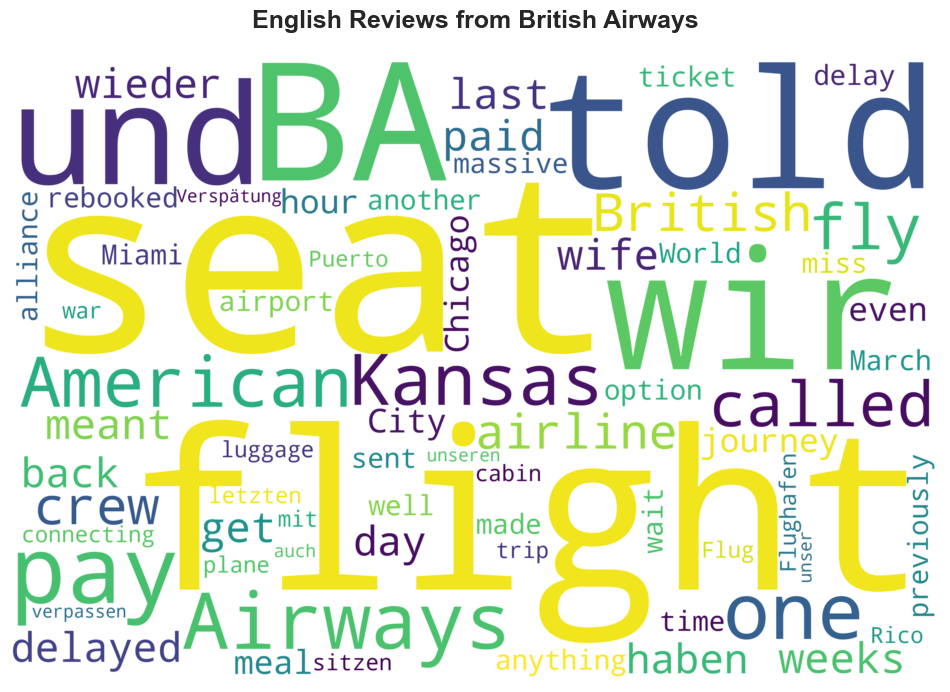

In [23]:
wordcloud = WordCloud(max_font_size=None, max_words=70,
                      background_color='white', collocations=False,
                      stopwords=stopwords.words('english'),
                      width=3000, height=2000)

wordcloud.generate(str(df.reviews.values))

plot_wordcloud(wordcloud, 'English')

## Sentiment Analysis (VADER)

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def vaderSentimentAnalysis(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vaderSentimentAnalysis)

In [19]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,| I was meant to fly in January to Algeria. I...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,...",mean fly January Algeria pay ticket day mean...,-0.5994,Negative
1,| We have flown repeatedly with British Airw...,We have flown repeatedly with British Airways...,"[(flown, v), (repeatedly, r), (British, a), (A...",fly repeatedly British Airways One World all...,-0.9442,Negative
2,| I was horrified by the extremely small sea...,I was horrified by the extremely small seats ...,"[(horrified, v), (extremely, r), (small, a), (...",horrify extremely small seat poor training c...,-0.5507,Negative
3,| \r\nThe worst cabin experience ever: cramp...,The worst cabin experience ever cramped seats...,"[(worst, a), (cabin, n), (experience, n), (eve...",bad cabin experience ever cramp seat low cos...,-0.9022,Negative
4,| First time flying with British Airways and ...,First time flying with British Airways and fi...,"[(First, a), (time, n), (flying, v), (British,...",First time fly British Airways first time fl...,0.9844,Positive


In [20]:
vader_count = df['Analysis'].value_counts()
vader_count

Positive    2085
Negative    1053
Neutral      369
Name: Analysis, dtype: int64

array([[<AxesSubplot:title={'center':'Sentiment'}>]], dtype=object)

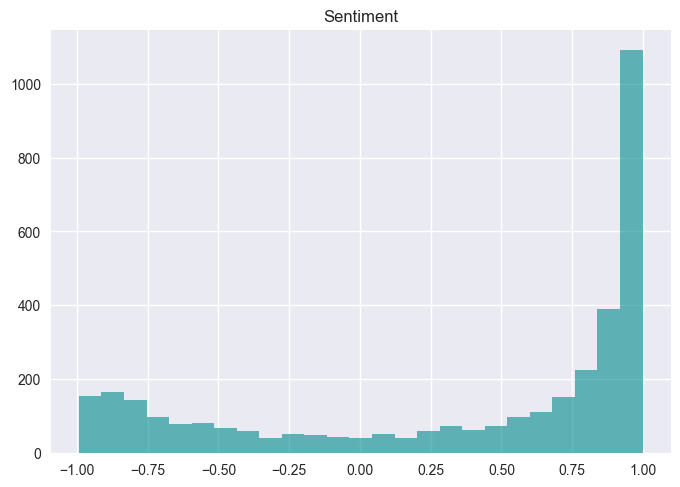

In [21]:
df.hist('Sentiment', bins=25, color='darkcyan', alpha=0.6)

In [22]:
import plotly.graph_objs as go

labels = vader_count.index
values = vader_count.values
colors = ['#B5EAD7','#F7B1C5','#F7D9C4']
#colors = ['#006400','#8B3A3A','#8B5A2B']

explode = (0.05,0.05,0.05)

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.7)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', textfont_size=20,
                  marker=dict(colors=colors),
                  pull=[0.05, 0.05, 0.05])

fig.show()